In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
clinical_csv = "raw_data/clinicaltrial_data.csv"
mouse_csv = "raw_data/mouse_drug_data.csv"
clinical_trial_df = pd.read_csv(clinical_csv)
mouse_drug_df = pd.read_csv(mouse_csv)

In [3]:
# merge two raw data
merged_df = pd.merge(clinical_trial_df,mouse_drug_df,on="Mouse ID")
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
# build dataframe showing the tumor volume changes over time for each treatment
merged_group_average = pd.DataFrame({"Tumor Volume (mm3)": merged_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()})       
merged_group_average.reset_index(inplace=True)
merged_group_average = merged_group_average.pivot(columns="Drug",index="Timepoint",values="Tumor Volume (mm3)")
merged_group_average.head(15)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# build dataframe showing sample error margin of the tumor volume changes over time for each treatment
merged_group_sem = pd.DataFrame({"Tumor Volume (mm3)": merged_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()}) 
merged_group_sem.reset_index(inplace=True)
merged_group_sem = merged_group_sem.pivot(columns="Drug",index="Timepoint",values="Tumor Volume (mm3)")
merged_group_sem.head(15)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


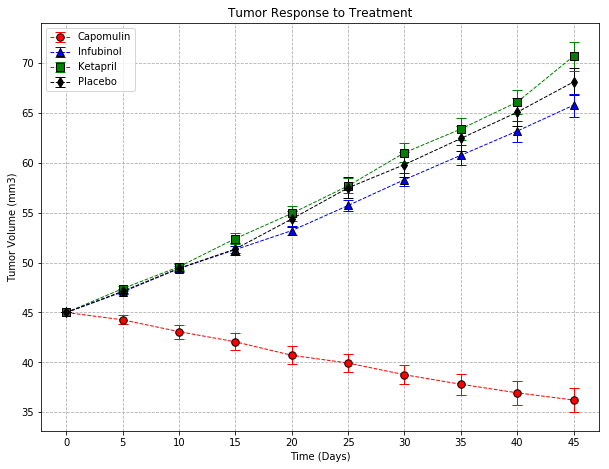

In [6]:
# scatter plot of four treatments (Capomulin, Infubinol, Ketapril, and Placebo) 
# with error bar that shows tumor volume change
plt.figure(figsize=(10,7.5))
capomulin_sem = plt.errorbar(x=merged_group_sem.index.values,
                             y=merged_group_average["Capomulin"],
                             yerr=merged_group_sem["Capomulin"],
                             color="red",linestyle="--",linewidth=1, 
                             marker='o',markersize=7.5, mec="black",
                             capsize=5,label="Capomulin")
infubinol_sem = plt.errorbar(x=merged_group_sem.index.values,
                             y=merged_group_average["Infubinol"],
                             yerr=merged_group_sem["Infubinol"],
                             color="blue",linestyle="--",linewidth=1, 
                             marker='^',markersize=7.5, mec="black",
                             capsize=5,label="Infubinol")
ketapril_sem = plt.errorbar(x=merged_group_sem.index.values,
                            y=merged_group_average["Ketapril"],
                            yerr=merged_group_sem["Ketapril"],
                            color="green",linestyle="--",linewidth=1, 
                            marker='s',markersize=7.5, mec="black",
                            capsize=5,label="Ketapril")
placebo_sem = plt.errorbar(x=merged_group_sem.index.values,
                           y=merged_group_average["Placebo"],
                           yerr=merged_group_sem["Placebo"],
                           color="black",linestyle="--",linewidth=1, 
                           marker='d',markersize=7.5, mec="black",
                           capsize=5,label="Placebo")
plt.legend(handles =[capomulin_sem,infubinol_sem,ketapril_sem,placebo_sem],loc="best")
plt.xticks(merged_group_sem.index.values)
plt.grid(linestyle='--')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [7]:
# build dataframe showing the number of metastatic sites changes over time for each treatment 
merged_metastatic_average = pd.DataFrame({"Metastatic Sites": merged_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()})       
merged_metastatic_average.reset_index(inplace=True)
merged_metastatic_average = merged_metastatic_average.pivot(columns="Drug",index="Timepoint",values="Metastatic Sites")
merged_metastatic_average.head(15)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [8]:
# build dataframe showing sample error margin of metastatic sites changes over time for each treatment
merged_metastatic_sem = pd.DataFrame({"Metastatic Sites": merged_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()}) 
merged_metastatic_sem.reset_index(inplace=True)
merged_metastatic_sem = merged_metastatic_sem.pivot(columns="Drug",index="Timepoint",values="Metastatic Sites")
merged_metastatic_sem.head(15)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


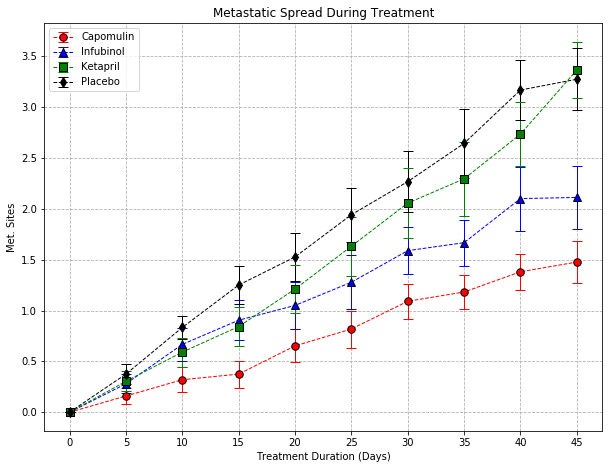

In [9]:
# scatter plot of four treatments (Capomulin, Infubinol, Ketapril, and Placebo) 
# with error bar that shows metastatic sites changes 
plt.figure(figsize=(10,7.5))
capomulin_sem = plt.errorbar(x=merged_metastatic_sem.index.values,
                             y=merged_metastatic_average["Capomulin"],
                             yerr=merged_metastatic_sem["Capomulin"],
                             color="red",linestyle="--",linewidth=1, 
                             marker='o',markersize=7.5, mec="black",
                             capsize=5,label="Capomulin")
infubinol_sem = plt.errorbar(x=merged_metastatic_sem.index.values,
                             y=merged_metastatic_average["Infubinol"],
                             yerr=merged_metastatic_sem["Infubinol"],
                             color="blue",linestyle="--",linewidth=1, 
                             marker='^',markersize=7.5, mec="black",
                             capsize=5,label="Infubinol")
ketapril_sem = plt.errorbar(x=merged_metastatic_sem.index.values,
                            y=merged_metastatic_average["Ketapril"],
                            yerr=merged_metastatic_sem["Ketapril"],
                            color="green",linestyle="--",linewidth=1, 
                            marker='s',markersize=7.5, mec="black",
                            capsize=5,label="Ketapril")
placebo_sem = plt.errorbar(x=merged_metastatic_sem.index.values,
                           y=merged_metastatic_average["Placebo"],
                           yerr=merged_metastatic_sem["Placebo"],
                           color="black",linestyle="--",linewidth=1, 
                           marker='d',markersize=7.5, mec="black",
                           capsize=5,label="Placebo")
plt.legend(handles =[capomulin_sem,infubinol_sem,ketapril_sem,placebo_sem],loc="best")
plt.xticks(merged_metastatic_sem.index.values)
plt.grid(linestyle='--')
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.show()

In [10]:
# build dataframe to show number of mice alive
mouse_count = pd.DataFrame({"Mouse Count": merged_df.groupby(["Drug","Timepoint"])["Mouse ID"].count()})       
mouse_count.reset_index(inplace=True)
mouse_count = mouse_count.pivot(columns="Drug",index="Timepoint",values="Mouse Count")
mouse_count = mouse_count/25*100
mouse_count.head(15)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


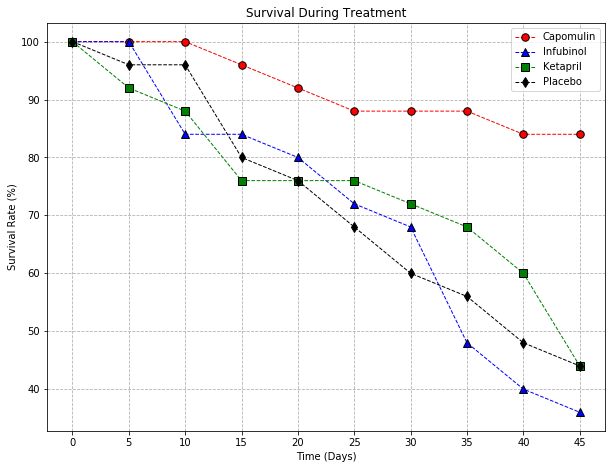

In [11]:
# scatter plot of four treatments that shows number of mice alive
plt.figure(figsize=(10,7.5))
capomulin_sem, = plt.plot(mouse_count.index.values, mouse_count["Capomulin"], 'ro--', mec="black",linewidth=1, markersize=7.5)
infubinol_sem, = plt.plot(mouse_count.index.values, mouse_count["Infubinol"], 'b^--', mec="black",linewidth=1, markersize=7.5)
ketapril_sem, = plt.plot(mouse_count.index.values, mouse_count["Ketapril"], 'gs--', mec="black",linewidth=1, markersize=7.5)
placebo_sem, = plt.plot(mouse_count.index.values, mouse_count["Placebo"], 'kd--', mec="black",linewidth=1, markersize=7.5)
plt.legend(handles =[capomulin_sem,infubinol_sem,ketapril_sem,placebo_sem],loc="best")
plt.xticks(merged_metastatic_sem.index.values)
plt.grid(linestyle='--')
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.show()

In [12]:
# calculate tumor change rate
tumor_change = (merged_group_average.loc[45,:]-merged_group_average.loc[0,:])/45*100
tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

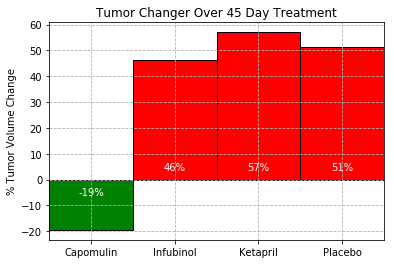

In [13]:
# bar graph that compares the total % tumor volume change for the four drugs
bar_chart = plt.bar([0,1,2,3], 
                    [tumor_change["Capomulin"],tumor_change["Infubinol"],tumor_change["Ketapril"],tumor_change["Placebo"]], 
                    width=1, linewidth=1)
for each_bar in bar_chart:
    if each_bar.get_height()< 0:
        each_bar.set_color('g')
        each_bar.set_edgecolor('k')
        height = each_bar.get_height()
        plt.text(each_bar.get_x() + each_bar.get_width()/2., -5,
                 str(int(height))+"%", ha='center', va='center',color="white")
    else:
        each_bar.set_color('r')
        each_bar.set_edgecolor('k')
        height = each_bar.get_height()
        plt.text(each_bar.get_x() + each_bar.get_width()/2., 5,
                 str(int(height))+"%", ha='center', va='center',color="white")    
plt.xlim(-0.5,3.5)
plt.xticks([0,1,2,3], ["Capomulin","Infubinol","Ketapril","Placebo"])
plt.grid(linestyle='--')
plt.title("Tumor Changer Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.show()